In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In this dataset, the same participants answered questions in 2012 and again 2014.

    Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
   

In [2]:
df = pd.read_csv(r"C:\Users\Ebel\Downloads\ESSdata_Thinkful.csv")
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.shape

(8594, 13)

In [4]:
df.isna().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [5]:
df.dropna().shape

(8147, 13)

That's acceptable so we'll drop the null values. 

In [6]:
df = df.dropna()

ppltrst, pplfair, and pplhlp seem to be very similar in what they ask, and I think the issue of correlation popped up in the last asssignment involving this data. Nonetheless, I'd like to check, for posterities sake if nothing else. 

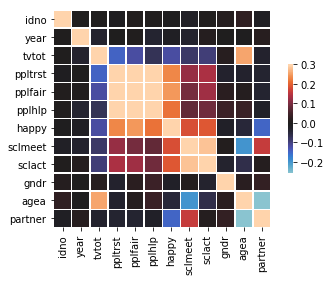

In [7]:
sns.heatmap(df.corr(), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As I suspected those three features are correlated. We'll combine them into a single feature. Something that can represent a cumulative value of the previous three. 

In [8]:
df['trust'] = ((df['ppltrst'] + df['pplfair'] + df['pplhlp'])/3)

Clearing up some of the unclear category values. 

In [9]:
df['year'].replace(6, 2012, inplace = True)
df['year'].replace(7, 2014, inplace= True)
df['gndr'].replace(1, 'M', inplace = True)
df['gndr'].replace(2, 'F', inplace= True)
df['partner'].replace(1, 'Present', inplace = True)
df['partner'].replace(2, 'Absent', inplace= True)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,trust
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,F,60.0,Present,6.000000
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,F,59.0,Present,5.666667
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,M,24.0,Absent,8.000000
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,F,64.0,Present,6.333333
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,F,55.0,Present,6.000000


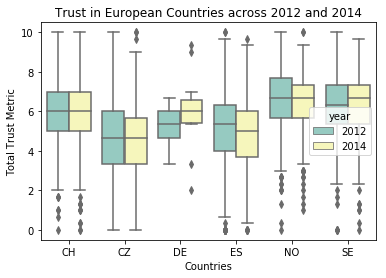

In [10]:
ax = sns.boxplot(x="cntry", y="trust", hue="year",
                data=df, palette="Set3")
plt.xlabel("Countries")
plt.ylabel("Total Trust Metric")
plt.title("Trust in European Countries across 2012 and 2014")
plt.show()

So, the chart shows that no countries average significantly drifted downward. In fact the average went up in Germany and Sweden. However some distributions, changed to have an overall distribution that was more negative. Names  CZ and ES. 

First we need to tell the distribution of these values, before deciding on the test to evaluate the statistical significance of each. 

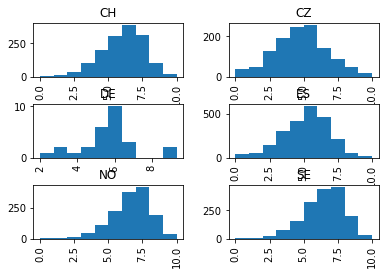

In [11]:
df['trust'].hist(by=df['cntry'])
plt.show()

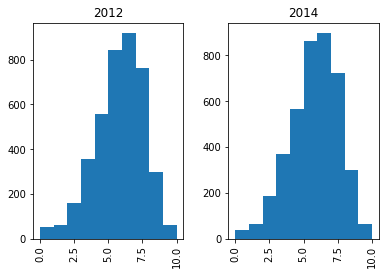

In [12]:
df['trust'].hist(by=df['year'])
plt.show()

In [13]:
CHd = df.loc[df['cntry'] == 'CH']
CZd = df.loc[df['cntry'] == 'CZ']
DEd = df.loc[df['cntry'] == 'DE']
ESd = df.loc[df['cntry'] == 'ES']
NOd = df.loc[df['cntry'] == 'NO']
SEd = df.loc[df['cntry'] == 'SE']
dfE = df.loc[df['year'] == 2012]
dfL = df.loc[df['year'] == 2014]

The data are normal, so we can move on to a parametric test for significance. 

In [14]:
print(df['trust'].groupby(df.cntry).mean())




print(stats.f_oneway(
    CHd.trust,
    DEd.trust,
    CZd.trust,
    ESd.trust,
    NOd.trust,
    SEd.trust))

# The F statistic.

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.


cntry
CH    5.892881
CZ    4.582160
DE    5.629630
ES    4.982257
NO    6.518779
SE    6.285245
Name: trust, dtype: float64
F_onewayResult(statistic=320.8076439011616, pvalue=1.5376861177e-314)


This satisfies the country comparison. Let's move on to the main objective of looking between the years. 

In [15]:
print('Overall trust difference')
print(stats.ttest_ind(dfE['trust'], dfL['trust']))
print('CH')
print(stats.ttest_ind(dfE['trust'].loc[df['cntry'] == 'CH'], dfL['trust'].loc[df['cntry'] == 'CH']))
print('DE')
print(stats.ttest_ind(dfE['trust'].loc[df['cntry'] == 'DE'], dfL['trust'].loc[df['cntry'] == 'DE']))
print('ES')
print(stats.ttest_ind(dfE['trust'].loc[df['cntry'] == 'ES'], dfL['trust'].loc[df['cntry'] == 'ES']))
print('NO')
print(stats.ttest_ind(dfE['trust'].loc[df['cntry'] == 'NO'], dfL['trust'].loc[df['cntry'] == 'NO']))
print('SE')
print(stats.ttest_ind(dfE['trust'].loc[df['cntry'] == 'SE'], dfL['trust'].loc[df['cntry'] == 'SE']))
print('CZ')
print(stats.ttest_ind(dfE['trust'].loc[df['cntry'] == 'CZ'], dfL['trust'].loc[df['cntry'] == 'CZ']))

Overall trust difference
Ttest_indResult(statistic=1.110632427380442, pvalue=0.2667593842142351)
CH
Ttest_indResult(statistic=0.3878079669552635, pvalue=0.6982141819750356)
DE
Ttest_indResult(statistic=-1.2325385049596251, pvalue=0.22921383029350412)
ES
Ttest_indResult(statistic=2.9014788009815673, pvalue=0.003749509727557669)
NO
Ttest_indResult(statistic=0.9641423854291722, pvalue=0.3351389357515805)
SE
Ttest_indResult(statistic=-2.433506210858561, pvalue=0.015054394912741914)
CZ
Ttest_indResult(statistic=0.777115397085561, pvalue=0.4372432177520532)


Looking at the results for Spain and Sweden, it seems that there was a statistically significant drop in trust in Spain, and statistically significant jump for Sweden. 

 Did people become happier from 2012 to 2014? Compute results for each country in the sample.


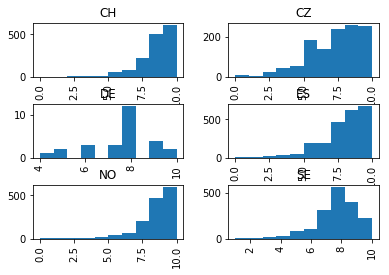

In [16]:
df['happy'].hist(by=df['cntry'])
plt.show()

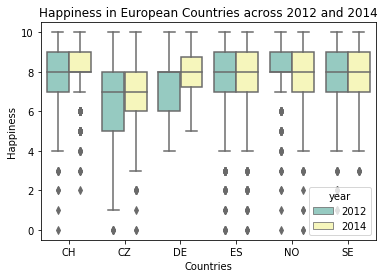

In [17]:
sns.boxplot(x="cntry", y='happy', hue="year",
                data=df, palette="Set3")
plt.xlabel("Countries")
plt.ylabel("Happiness")
plt.title("Happiness in European Countries across 2012 and 2014")
plt.show()

In [18]:
print('Overall happiness difference')
print(stats.ttest_ind(dfE['happy'], dfL['happy']))
print('CH')
print(stats.ttest_ind(dfE['happy'].loc[df['cntry'] == 'CH'], dfL['happy'].loc[df['cntry'] == 'CH']))
print('DE')
print(stats.ttest_ind(dfE['happy'].loc[df['cntry'] == 'DE'], dfL['happy'].loc[df['cntry'] == 'DE']))
print('ES')
print(stats.ttest_ind(dfE['happy'].loc[df['cntry'] == 'ES'], dfL['happy'].loc[df['cntry'] == 'ES']))
print('NO')
print(stats.ttest_ind(dfE['happy'].loc[df['cntry'] == 'NO'], dfL['happy'].loc[df['cntry'] == 'NO']))
print('SE')
print(stats.ttest_ind(dfE['happy'].loc[df['cntry'] == 'SE'], dfL['happy'].loc[df['cntry'] == 'SE']))
print('CZ')
print(stats.ttest_ind(dfE['happy'].loc[df['cntry'] == 'CZ'], dfL['happy'].loc[df['cntry'] == 'CZ']))

Overall happiness difference
Ttest_indResult(statistic=1.2074597686358974, pvalue=0.2272901912283969)
CH
Ttest_indResult(statistic=-0.812142488327401, pvalue=0.4168411011770018)
DE
Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073)
ES
Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369)
NO
Ttest_indResult(statistic=4.152957205997266, pvalue=3.4778681704487346e-05)
SE
Ttest_indResult(statistic=-0.5372790210326394, pvalue=0.5911442306272388)
CZ
Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238)


Who reported watching more TV in 2012, men or women?
    

In [30]:
gender= df.groupby(df['gndr'])
gender['tvtot'].mean()

gndr
F    3.854847
M    3.782842
Name: tvtot, dtype: float64

So... technically women did. But that difference is very small. We'll test for significance first. 

In [31]:
print(stats.ttest_ind(dfE['tvtot'].loc[dfE['gndr'] == 'M'], dfE['tvtot'].loc[dfE['gndr'] == 'F']))

Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)


As suspected, these results are not statistically significant. 

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
    

In [33]:
part= df.groupby(df['partner'])
part['pplfair'].mean()

partner
Absent     5.913848
Present    6.062238
Name: pplfair, dtype: float64

Once again, it seems like a very small difference. 

In [35]:
print(stats.ttest_ind(dfE['pplfair'].loc[dfE['partner'] == 'Present'], dfE['pplfair'].loc[dfE['partner'] == 'Absent']))

Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)


I stand corrected. That is a significant difference. 

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
    

In [21]:
df['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

In [22]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,trust
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,F,60.0,Present,6.000000
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,F,59.0,Present,5.666667
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,M,24.0,Absent,8.000000
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,F,64.0,Present,6.333333
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,F,55.0,Present,6.000000


In [23]:

countries = df[~df.cntry.str.contains("CZ")]
countries = countries[~countries.cntry.str.contains("DE")]
countries = countries[countries.year == 2014]

In [24]:
countries.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,trust
773,CH,5.0,2014,2.0,8.0,9.0,7.0,9.0,6.0,4.0,M,69.0,Present,8.000000
774,CH,25.0,2014,4.0,4.0,2.0,5.0,6.0,5.0,3.0,M,30.0,Present,3.666667
775,CH,26.0,2014,3.0,8.0,8.0,6.0,8.0,7.0,5.0,F,49.0,Absent,7.333333
776,CH,28.0,2014,2.0,7.0,7.0,5.0,9.0,6.0,2.0,M,51.0,Present,6.333333
777,CH,29.0,2014,2.0,4.0,7.0,0.0,8.0,6.0,2.0,F,32.0,Absent,3.666667


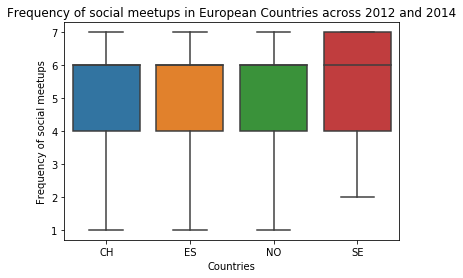

In [25]:
sns.boxplot(x="cntry", y='sclmeet',
                data=countries)
plt.xlabel("Countries")
plt.ylabel("Frequency of social meetups")
plt.title("Frequency of social meetups in European Countries across 2012 and 2014")
plt.show()

It looks like Sweden sticks out a bit here as an especially social place. However, it should be checked against the others for statistical significance. 

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=countries.sclmeet,      # Data
                          groups=countries.cntry,   # Groups
                          alpha=0.05)         # Significance level
tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,ES,0.0887,-0.0779,0.2553,False
CH,NO,0.1354,-0.0497,0.3206,False
CH,SE,0.2599,0.0834,0.4363,True
ES,NO,0.0467,-0.1221,0.2155,False
ES,SE,0.1712,0.0119,0.3304,True
NO,SE,0.1244,-0.0541,0.303,False


So, the Swedish had more social meetings in a statistically significant way when compared to Swiss and Spanish counterparts.

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


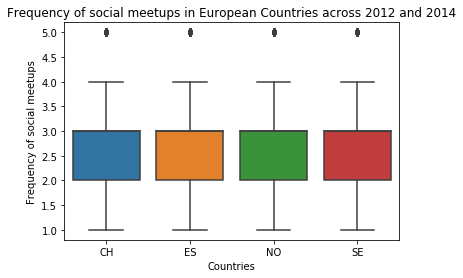

In [26]:
sns.boxplot(x="cntry", y='sclact',
                data=countries)
plt.xlabel("Countries")
plt.ylabel("Frequency of social meetups")
plt.title("Frequency of social meetups in European Countries across 2012 and 2014")
plt.show()

In [41]:
stats.kruskal(
    countries['sclact'].loc[df['cntry'] == 'CH'],
    countries['sclact'].loc[df['cntry'] == 'ES'],
    countries['sclact'].loc[df['cntry'] == 'NO'],
    countries['sclact'].loc[df['cntry'] == 'SE'])

KruskalResult(statistic=45.06202360796973, pvalue=8.976084640583497e-10)

So, a very statistically significant result in terms of these being different, which I find suspicious. It's very possible that this was not the correct test for the sample. I figured that the data were not normal, from the look of the boxchart, and thus chose this test. If this test was incorrect, let me know. 